In [91]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime
from pandas.io.json import json_normalize
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

import matplotlib as mpl
font_name = "STKaiti"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False

# Data Visualization

In [92]:
df = pd.read_csv('ted_main.csv')
# sort the column name order
df = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]

In [4]:
print(len(df))
df.head()

2550


,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [93]:
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%Y-%m-%d'))
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:10]
pop_talks

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,2006-02-25
1346,Your body language may shape who you are,Amy Cuddy,43155405,2012-06-26
677,How great leaders inspire action,Simon Sinek,34309432,2009-09-17
837,The power of vulnerability,Brené Brown,31168150,2010-06-06
452,10 things you didn't know about orgasm,Mary Roach,22270883,2009-02-06
1776,How to speak so that people want to listen,Julian Treasure,21594632,2013-06-10
201,My stroke of insight,Jill Bolte Taylor,21190883,2008-02-27
5,Why we do what we do,Tony Robbins,20685401,2006-02-02
2114,This is what happens when you reply to spam email,James Veitch,20475972,2015-12-08
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,2012-10-27


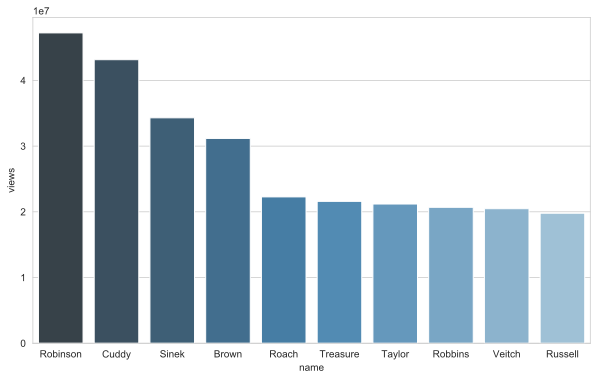

In [94]:
pop_talks['name'] = pop_talks['main_speaker'].apply(lambda x: x.split()[-1])
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='name', y='views', data=pop_talks, palette="Blues_d")

In [95]:
df['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

In [96]:
#df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['year'] = df['film_date'].apply(lambda x: x.split('-')[0])
year_df = pd.DataFrame(df['year'].value_counts().reset_index())
year_df.columns = ['year', 'talks']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

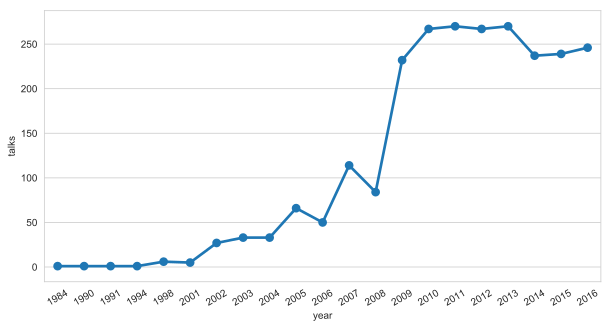

In [97]:
plt.figure(figsize=(10,5))
sns.pointplot(x='year', y='talks', data=year_df.sort_values('year')[2:-1])
plt.xticks(rotation=30)


In [98]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

In [99]:
df['tags'].head()

0    ['children', 'creativity', 'culture', 'dance',...
1    ['alternative energy', 'cars', 'climate change...
2    ['computers', 'entertainment', 'interface desi...
3    ['MacArthur grant', 'activism', 'business', 'c...
4    ['Africa', 'Asia', 'Google', 'demo', 'economic...
Name: tags, dtype: object

In [100]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [101]:
df['tags'].head(10)

0    [children, creativity, culture, dance, educati...
1    [alternative energy, cars, climate change, cul...
2    [computers, entertainment, interface design, m...
3    [MacArthur grant, activism, business, cities, ...
4    [Africa, Asia, Google, demo, economics, global...
5    [business, culture, entertainment, goal-settin...
6    [Christianity, God, atheism, comedy, culture, ...
7    [architecture, collaboration, culture, design,...
8    [God, TED Brain Trust, atheism, brain, cogniti...
9    [Christianity, God, culture, happiness, leader...
Name: tags, dtype: object

In [102]:
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'tag'

In [103]:
theme_df = df.drop('tags', axis=1).join(s)

In [104]:
pop_themes = pd.DataFrame(theme_df['tag'].value_counts()).reset_index()
pop_themes.columns = ['tag', 'talks']
pop_themes.head(10)

,tag,talks
0,technology,727
1,science,567
2,global issues,501
3,culture,486
4,TEDx,450
5,design,418
6,business,348
7,entertainment,299
8,health,236
9,innovation,229


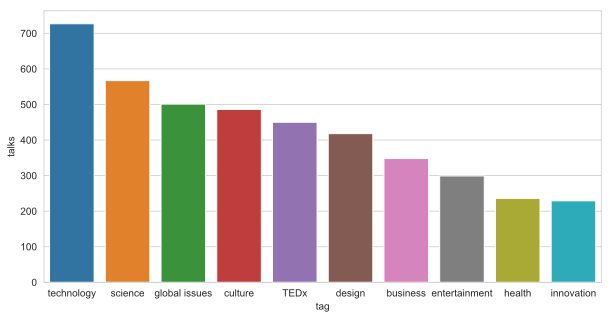

In [106]:
plt.figure(figsize=(10,5))
sns.barplot(x='tag', y='talks', data=pop_themes.head(10))
plt.show()

# Transcript Pre-analysis

In [109]:
df2 = pd.read_csv('transcripts.csv')
df2.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [110]:
df3 = pd.merge(left=df,right=df2, how='inner', left_on='url', right_on='url')
df3.count()

name                  2467
title                 2467
description           2467
main_speaker          2467
speaker_occupation    2461
num_speaker           2467
duration              2467
event                 2467
film_date             2467
published_date        2467
comments              2467
tags                  2467
languages             2467
ratings               2467
related_talks         2467
url                   2467
views                 2467
year                  2467
transcript            2467
dtype: int64

# Cosine Similarity

In [111]:
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
from time import time

In [231]:
Text = df3['transcript'].tolist()
tfidf=text.TfidfVectorizer(input=Text,stop_words="english")
matrix = tfidf.fit_transform(Text)

In [113]:
print(matrix.shape)

(2467, 58489)


In [232]:
sim_unigram = cosine_similarity(matrix)

In [115]:
sim_unigram.shape

(2467, 2467)

In [263]:
tt = df3.loc[sim_unigram[0].argsort()[-20:-1]]
tt[["main_speaker", 'title']]

,main_speaker,title
354,Kary Mullis,Play! Experiment! Discover!
685,Charles Leadbeater,Education innovation in the slums
6,Julia Sweeney,Letting go of God
2235,Kandice Sumner,How America's public schools keep kids in poverty
727,Sugata Mitra,The child-driven education
430,Sarah Jones,A one-woman global village
364,David Carson,Design and discovery
177,Bill Strickland,"Rebuilding a neighborhood with beauty, dignity..."
603,Raghava KK,My 5 lives as an artist
1412,Rita Pierson,Every kid needs a champion


In [251]:
df3.loc[0]['title']

'How I stopped the Taliban from shutting down my school'

In [260]:
pd.DataFrame.from_dict(df3.loc[0]['related_talks'])[['id', 'speaker', 'title']]


,id,speaker,title
0,865,Ken Robinson,Bring on the learning revolution!
1,1738,Ken Robinson,How to escape education's death valley
2,2276,Linda Cliatt-Wayman,"How to fix a broken school? Lead fearlessly, l..."
3,892,Charles Leadbeater,Education innovation in the slums
4,1232,Geoff Mulgan,A short intro to the Studio School
5,2616,Kandice Sumner,How America's public schools keep kids in poverty


In [ ]:
df3

# Topic Model

In [176]:
vectorizer = text.TfidfVectorizer( 
                        stop_words="english",
                        use_idf=True,
                        ngram_range=(1,1),
                        min_df = 0.05,     
                        max_df = 0.3)
t0 = time()

tfidf = vectorizer.fit_transform(df3['transcript'])
print("done in %0.3fs." % (time() - t0))

done in 3.124s.


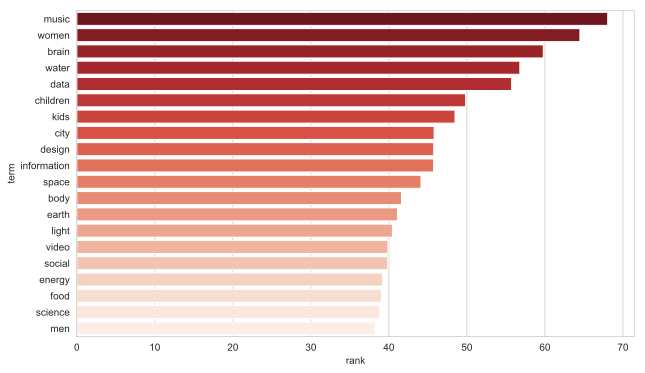

In [177]:
def rank_words(terms, feature_matrix):
    sums = feature_matrix.sum(axis=0)
    data = []
    for col, term in enumerate(terms):
        data.append( (term, sums[0,col]) )
    ranked = pd.DataFrame(data, columns=['term','rank']).sort_values('rank', ascending=False)
    return ranked

ranked = rank_words(terms=vectorizer.get_feature_names(), feature_matrix=tfidf)

fig, ax = plt.subplots(figsize=(10,6), ncols=1, nrows=1)
sns.barplot(x='rank',y='term',data=ranked[:20], palette='Reds_r', ax=ax);

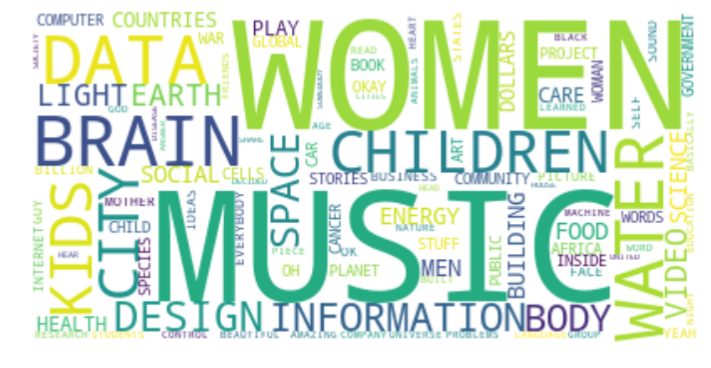

In [178]:
dic = {ranked.loc[i,'term'].upper(): ranked.loc[i,'rank'] for i in range(0,len(ranked))}

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white',
                      max_words=100,
                      ).generate_from_frequencies(dic)
fig = plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [214]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD

n_topics = 16
#lda = LatentDirichletAllocation(n_components=n_topics, random_state=0,learning_method='batch')
tsvd = TruncatedSVD(n_components=n_topics, n_iter=10)

#topics = lda.fit_transform(tfidf)
topics = tsvd.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(tsvd.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words


{0: ['women', 'brain', 'water', 'data', 'music'],
 1: ['women', 'men', 'girls', 'woman', 'children'],
 2: ['music', 'play', 'sound', 'song', 'video'],
 3: ['brain', 'cells', 'cancer', 'body', 'patients'],
 4: ['women', 'water', 'earth', 'men', 'ocean'],
 5: ['music', 'cancer', 'cells', 'health', 'disease'],
 6: ['cancer', 'kids', 'city', 'design', 'patients'],
 7: ['brain', 'children', 'kids', 'food', 'child'],
 8: ['city', 'brain', 'cities', 'women', 'design'],
 9: ['women', 'kids', 'data', 'children', 'water'],
 10: ['universe', 'children', 'space', 'earth', 'stars'],
 11: ['data', 'city', 'health', 'patients', 'brain'],
 12: ['energy', 'ca', 'car', 'oil', 'dollars'],
 13: ['design', 'africa', 'health', 'patients', 'water'],
 14: ['africa', 'cells', 'video', 'countries', 'india'],
 15: ['cancer', 'water', 'ocean', 'students', 'video']}

In [217]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

n_topics = 16
nmf = NMF(n_components=n_topics, random_state=0)

topics = nmf.fit_transform(tfidf)
top_n_words = 5
t_words, word_strengths = {}, {}
for t_id, t in enumerate(nmf.components_):
    t_words[t_id] = [vectorizer.get_feature_names()[i] for i in t.argsort()[:-top_n_words - 1:-1]]
    word_strengths[t_id] = t[t.argsort()[:-top_n_words - 1:-1]]
t_words


{0: ['god', 'stories', 'book', 'father', 'oh'],
 1: ['women', 'men', 'girls', 'woman', 'sex'],
 2: ['music', 'play', 'sound', 'song', 'ends'],
 3: ['brain', 'brains', 'body', 'activity', 'behavior'],
 4: ['water', 'ocean', 'fish', 'animals', 'species'],
 5: ['countries', 'africa', 'government', 'global', 'war'],
 6: ['health', 'patients', 'care', 'disease', 'medical'],
 7: ['computer', 'video', 'internet', 'machine', 'information'],
 8: ['city', 'cities', 'urban', 'building', 'community'],
 9: ['kids', 'children', 'education', 'students', 'teachers'],
 10: ['universe', 'earth', 'space', 'stars', 'light'],
 11: ['data', 'information', 'numbers', 'web', 'map'],
 12: ['energy', 'oil', 'food', 'car', 'carbon'],
 13: ['design', 'building', 'designers', 'art', 'architecture'],
 14: ['cells', 'dna', 'cell', 'body', 'genes'],
 15: ['cancer', 'drug', 'disease', 'blood', 'patient']}

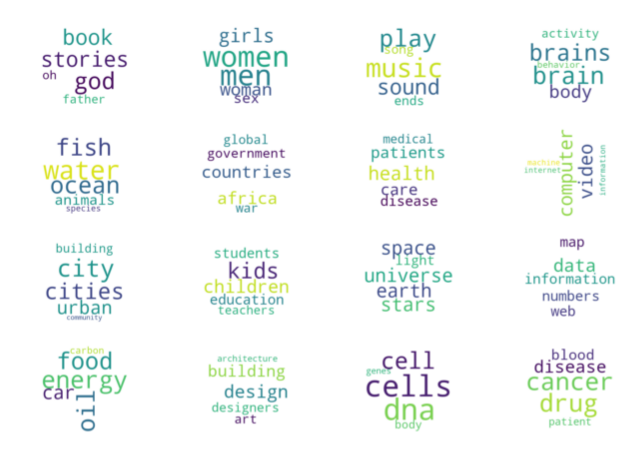

In [218]:
fig, ax = plt.subplots(4, 4, figsize=(10, 10))
plt.subplots_adjust(left=0.05, right=0.95, top=0.8, bottom=0.2, hspace=0, wspace=0)
# mask for wordcloud
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

for i in range(4):
    for j in range(4):
        cluster = {}
        for word in t_words[i*4+j]:
            cluster[word] = 1 #np.random.rand()
        wc = WordCloud(background_color='white', mask=mask).generate_from_frequencies(cluster)
        ax[i,j].imshow(wc, interpolation='bilinear')
        ax[i,j].axis("off")
        


In [219]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tfidf', vectorizer),
    ('nmf', nmf)
])

document_id = 0
t = pipe.transform([df3['transcript'].iloc[document_id]]) 
print('Topic distribution for document #{}: \n'.format(document_id),t)
print('Relevant topics for document #{}: \n'.format(document_id),np.where(t>0.01)[1])
print('\nTranscript:\n',df3['transcript'].iloc[document_id][:1000],'...')

talk = df3.iloc[document_id]
print('\nTrue tags from ted_main.csv: \n', talk['tags'])

Topic distribution for document #0: 
 [[0.0496931  0.02696337 0.03239478 0.02144272 0.00915979 0.
  0.         0.0005911  0.         0.16010673 0.02525814 0.
  0.         0.00959151 0.         0.00154271]]
Relevant topics for document #0: 
 [ 0  1  2  3  9 10]

Transcript:
 Good morning. How are you?(Laughter)It's been great, hasn't it? I've been blown away by the whole thing. In fact, I'm leaving.(Laughter)There have been three themes running through the conference which are relevant to what I want to talk about. One is the extraordinary evidence of human creativity in all of the presentations that we've had and in all of the people here. Just the variety of it and the range of it. The second is that it's put us in a place where we have no idea what's going to happen, in terms of the future. No idea how this may play out.I have an interest in education. Actually, what I find is everybody has an interest in education. Don't you? I find this very interesting. If you're at a dinner party

In [229]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + ' \\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return ''.join(rv)

In [230]:
bmatrix(t.reshape(4,4))

'\\begin{bmatrix}  0.0496931 & 0.02696337 & 0.03239478 & 0.02144272 \\  0.00915979 & 0. & 0. & 0.0005911 \\  0. & 0.16010673 & 0.02525814 & 0. \\  0. & 0.00959151 & 0. & 0.00154271 \\\\end{bmatrix}'